In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

In [285]:
# read datasdet using pandas
tesla_stock_data = pd.read_csv('TSLA_all_supported_frames.csv')

In [286]:
tesla_stock_data.head()

,Unnamed: 0,Open,High,Low,Close,Volume,Frame
0,11/19/2024 19:59,344.91,345.00,344.91,344.99,10210,1min
1,11/19/2024 19:58,345.04,345.05,344.90,344.99,5771,1min
2,11/19/2024 19:57,345.02,345.08,344.81,345.04,5140,1min
3,11/19/2024 19:56,345.03,345.04,345.00,345.01,1799,1min
4,11/19/2024 19:55,345.00,345.08,345.00,345.00,2259,1min


In [287]:
tesla_stock_data.tail()

,Unnamed: 0,Open,High,Low,Close,Volume,Frame
32352,11/30/2010 0:00,21.94,36.00,21.05,35.330,28315100,Monthly
32353,10/29/2010 0:00,20.69,21.87,20.00,21.840,6547800,Monthly
32354,9/30/2010 0:00,19.62,23.16,19.50,20.405,18045900,Monthly
32355,8/31/2010 0:00,20.50,22.18,17.39,19.480,15038200,Monthly
32356,7/30/2010 0:00,25.00,25.92,14.98,19.940,64575800,Monthly


In [288]:
tesla_stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32357 entries, 0 to 32356
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32357 non-null  object 
 1   Open        32357 non-null  float64
 2   High        32357 non-null  float64
 3   Low         32357 non-null  float64
 4   Close       32357 non-null  float64
 5   Volume      32357 non-null  int64  
 6   Frame       32357 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.7+ MB


In [289]:
tesla_stock_data.describe()

,Open,High,Low,Close,Volume
count,32357.000000,32357.000000,32357.000000,32357.000000,3.235700e+04
mean,283.799256,285.832134,281.361191,283.847299,9.293756e+06
std,113.052536,117.997792,109.205824,113.382841,8.395515e+07
min,16.140000,16.630000,14.980000,15.800000,5.000000e+00
25%,247.100000,247.700000,244.860000,247.140000,8.214000e+03
50%,262.910200,265.000000,262.150000,262.900000,8.816800e+04
75%,323.530000,324.800000,322.100000,323.510000,5.207090e+05
max,2295.120000,2318.490000,2186.520000,2238.750000,3.897499e+09


In [290]:
tesla_stock_data.isnull().sum()

Unnamed: 0    0
Open          0
High          0
Low           0
Close         0
Volume        0
Frame         0
dtype: int64

In [291]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

tesla_stock_data['Frame_encoded'] = label_encoder.fit_transform(tesla_stock_data['Frame'])

frame_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Mapping of Frames to Encoded Values:", frame_mapping)


Mapping of Frames to Encoded Values: {'15min': np.int64(0), '1min': np.int64(1), '30min': np.int64(2), '5min': np.int64(3), '60min': np.int64(4), 'Daily': np.int64(5), 'Monthly': np.int64(6), 'Weekly': np.int64(7)}


In [292]:
tesla_stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32357 entries, 0 to 32356
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     32357 non-null  object 
 1   Open           32357 non-null  float64
 2   High           32357 non-null  float64
 3   Low            32357 non-null  float64
 4   Close          32357 non-null  float64
 5   Volume         32357 non-null  int64  
 6   Frame          32357 non-null  object 
 7   Frame_encoded  32357 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 2.0+ MB


In [293]:
tesla_stock_data.head()

,Unnamed: 0,Open,High,Low,Close,Volume,Frame,Frame_encoded
0,11/19/2024 19:59,344.91,345.00,344.91,344.99,10210,1min,1
1,11/19/2024 19:58,345.04,345.05,344.90,344.99,5771,1min,1
2,11/19/2024 19:57,345.02,345.08,344.81,345.04,5140,1min,1
3,11/19/2024 19:56,345.03,345.04,345.00,345.01,1799,1min,1
4,11/19/2024 19:55,345.00,345.08,345.00,345.00,2259,1min,1


In [294]:
tesla_stock_data = tesla_stock_data.drop(columns=['Frame'])


In [295]:
# Rename and convert DateTime column
tesla_stock_data = tesla_stock_data.rename(columns={'Unnamed: 0': 'DateTime'})
tesla_stock_data['DateTime'] = pd.to_datetime(tesla_stock_data['DateTime'])
tesla_stock_data.head()

,DateTime,Open,High,Low,Close,Volume,Frame_encoded
0,2024-11-19 19:59:00,344.91,345.00,344.91,344.99,10210,1
1,2024-11-19 19:58:00,345.04,345.05,344.90,344.99,5771,1
2,2024-11-19 19:57:00,345.02,345.08,344.81,345.04,5140,1
3,2024-11-19 19:56:00,345.03,345.04,345.00,345.01,1799,1
4,2024-11-19 19:55:00,345.00,345.08,345.00,345.00,2259,1


In [296]:
# Add additional features
tesla_stock_data['Day_of_week'] = tesla_stock_data['DateTime'].dt.dayofweek
tesla_stock_data['Month'] = tesla_stock_data['DateTime'].dt.month
tesla_stock_data['Hour'] = tesla_stock_data['DateTime'].dt.hour
tesla_stock_data.tail()

,DateTime,Open,High,Low,Close,Volume,Frame_encoded,Day_of_week,Month,Hour
32352,2010-11-30,21.94,36.00,21.05,35.330,28315100,6,1,11,0
32353,2010-10-29,20.69,21.87,20.00,21.840,6547800,6,4,10,0
32354,2010-09-30,19.62,23.16,19.50,20.405,18045900,6,3,9,0
32355,2010-08-31,20.50,22.18,17.39,19.480,15038200,6,1,8,0
32356,2010-07-30,25.00,25.92,14.98,19.940,64575800,6,4,7,0


In [297]:
# Split data by frame
# frames = ['Daily', 'Weekly', 'Monthly', '1min', '5min', '15min', '30min', '60min']
data_by_frame = {}
for frame, encoded_value in frame_mapping.items():
    frame_data = tesla_stock_data[tesla_stock_data['Frame_encoded'] == encoded_value]
    frame_data = frame_data.sort_values(by='DateTime')
    data_by_frame[frame] = frame_data
    print(f"{frame} Data: {frame_data.shape}")

15min Data: (1408, 10)
1min Data: (21120, 10)
30min Data: (704, 10)
5min Data: (4224, 10)
60min Data: (352, 10)
Daily Data: (3625, 10)
Monthly Data: (173, 10)
Weekly Data: (751, 10)


In [298]:
tesla_stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32357 entries, 0 to 32356
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DateTime       32357 non-null  datetime64[ns]
 1   Open           32357 non-null  float64       
 2   High           32357 non-null  float64       
 3   Low            32357 non-null  float64       
 4   Close          32357 non-null  float64       
 5   Volume         32357 non-null  int64         
 6   Frame_encoded  32357 non-null  int64         
 7   Day_of_week    32357 non-null  int32         
 8   Month          32357 non-null  int32         
 9   Hour           32357 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(3), int64(2)
memory usage: 2.1 MB


In [299]:
def apply_robust_scaler(df, column):
    scaler = RobustScaler()
    df[f"{column}_scaled"] = scaler.fit_transform(df[[column]])
    return df

In [300]:
for frame, frame_data in data_by_frame.items():
    if 'Volume' in frame_data.columns:
        frame_data['Volume_log'] = np.log1p(frame_data['Volume'])
        frame_data = apply_robust_scaler(frame_data, 'Volume_log')
        data_by_frame[frame] = frame_data

In [301]:
print("Daily Data (Sorted by DateTime):")
daily_data = data_by_frame['Daily'].sort_values(by='DateTime')
daily_data.head()

Daily Data (Sorted by DateTime):


,DateTime,Open,High,Low,Close,Volume,Frame_encoded,Day_of_week,Month,Hour,Volume_log,Volume_log_scaled
31432,2010-06-29,19.00,25.0000,17.54,23.89,18766300,5,1,6,0,16.747573,0.473192
31431,2010-06-30,25.79,30.4192,23.30,23.83,17187100,5,2,6,0,16.659670,0.428848
31430,2010-07-01,25.00,25.9200,20.27,21.96,8218800,5,3,7,0,15.921935,0.056688
31429,2010-07-02,23.00,23.1000,18.71,19.20,5139800,5,4,7,0,15.452525,-0.180111
31428,2010-07-06,20.00,20.0000,15.83,16.11,6866900,5,1,7,0,15.742223,-0.033969


In [302]:

print("Monthly Data (Sorted by DateTime):")
monthly_data = data_by_frame['Monthly'].sort_values(by='DateTime')
monthly_data.head()

Monthly Data (Sorted by DateTime):


,DateTime,Open,High,Low,Close,Volume,Frame_encoded,Day_of_week,Month,Hour,Volume_log,Volume_log_scaled
32356,2010-07-30,25.00,25.92,14.98,19.940,64575800,6,4,7,0,17.983350,-0.528968
32355,2010-08-31,20.50,22.18,17.39,19.480,15038200,6,1,8,0,16.526104,-1.349562
32354,2010-09-30,19.62,23.16,19.50,20.405,18045900,6,3,9,0,16.708429,-1.246892
32353,2010-10-29,20.69,21.87,20.00,21.840,6547800,6,4,10,0,15.694640,-1.817770
32352,2010-11-30,21.94,36.00,21.05,35.330,28315100,6,1,11,0,17.158906,-0.993223


In [303]:
print("1min Data (Sorted by DateTime):")
one_min_data = data_by_frame['1min'].sort_values(by='DateTime')
one_min_data.head()

1min Data (Sorted by DateTime):


,DateTime,Open,High,Low,Close,Volume,Frame_encoded,Day_of_week,Month,Hour,Volume_log,Volume_log_scaled
21119,2024-10-21 04:00:00,219.70,221.00,219.25,219.70,11517,1,0,10,4,9.351666,-0.202133
21118,2024-10-21 04:01:00,219.69,219.70,219.47,219.65,4380,1,0,10,4,8.385032,-0.470943
21117,2024-10-21 04:02:00,219.68,219.83,219.60,219.72,4658,1,0,10,4,8.446556,-0.453834
21116,2024-10-21 04:03:00,219.73,219.77,219.60,219.70,3316,1,0,10,4,8.106816,-0.548312
21115,2024-10-21 04:04:00,219.62,219.69,219.20,219.41,11845,1,0,10,4,9.379746,-0.194325


In [304]:
print("5min Data (Sorted by DateTime):")
five_min_data = data_by_frame['5min'].sort_values(by='DateTime')
five_min_data.head()

5min Data (Sorted by DateTime):


,DateTime,Open,High,Low,Close,Volume,Frame_encoded,Day_of_week,Month,Hour,Volume_log,Volume_log_scaled
25343,2024-10-21 04:00:00,219.70,221.00,219.20,219.41,35716,3,0,10,4,10.483382,-0.371666
25342,2024-10-21 04:05:00,219.44,219.49,219.06,219.14,19114,3,0,10,4,9.858229,-0.547286
25341,2024-10-21 04:10:00,219.10,219.35,219.00,219.07,19198,3,0,10,4,9.862613,-0.546054
25340,2024-10-21 04:15:00,219.16,219.21,219.00,219.13,18472,3,0,10,4,9.824065,-0.556883
25339,2024-10-21 04:20:00,219.15,219.27,219.08,219.15,7380,3,0,10,4,8.906664,-0.814603


In [305]:
print("15min Data (Sorted by DateTime):")
fifteen_min_data = data_by_frame['15min'].sort_values(by='DateTime')
fifteen_min_data.head()

15min Data (Sorted by DateTime):


,DateTime,Open,High,Low,Close,Volume,Frame_encoded,Day_of_week,Month,Hour,Volume_log,Volume_log_scaled
26751,2024-10-21 04:00:00,219.70,221.00,219.00,219.07,74028,0,0,10,4,11.212212,-0.537976
26750,2024-10-21 04:15:00,219.16,219.27,219.00,219.11,32438,0,0,10,4,10.387117,-0.772070
26749,2024-10-21 04:30:00,219.11,219.54,219.00,219.34,33414,0,0,10,4,10.416760,-0.763660
26748,2024-10-21 04:45:00,219.39,219.48,219.13,219.34,21717,0,0,10,4,9.985897,-0.885903
26747,2024-10-21 05:00:00,219.32,219.40,219.26,219.28,14836,0,0,10,5,9.604879,-0.994005


In [306]:
print("30min Data (Sorted by DateTime):")
thirty_min_data = data_by_frame['30min'].sort_values(by='DateTime')
thirty_min_data.head()

30min Data (Sorted by DateTime):


,DateTime,Open,High,Low,Close,Volume,Frame_encoded,Day_of_week,Month,Hour,Volume_log,Volume_log_scaled
27455,2024-10-21 04:00:00,219.70,221.00,219.00,219.11,106466,2,0,10,4,11.575590,-0.646422
27454,2024-10-21 04:30:00,219.11,219.54,219.00,219.34,55131,2,0,10,4,10.917486,-0.832271
27453,2024-10-21 05:00:00,219.32,219.40,219.00,219.04,45703,2,0,10,5,10.729941,-0.885234
27452,2024-10-21 05:30:00,219.00,219.20,218.84,218.95,56004,2,0,10,5,10.933196,-0.827834
27451,2024-10-21 06:00:00,218.96,219.16,218.75,219.07,67447,2,0,10,6,11.119112,-0.775332


In [307]:
print("60min Data (Sorted by DateTime):")
sixty_min_data = data_by_frame['60min'].sort_values(by='DateTime')
sixty_min_data.head()

60min Data (Sorted by DateTime):


,DateTime,Open,High,Low,Close,Volume,Frame_encoded,Day_of_week,Month,Hour,Volume_log,Volume_log_scaled
27807,2024-10-21 04:00:00,219.7000,221.00,219.0000,219.3400,161597,4,0,10,4,11.992867,-0.957589
27806,2024-10-21 05:00:00,219.3200,219.40,218.8400,218.9500,101707,4,0,10,5,11.529861,-1.096112
27805,2024-10-21 06:00:00,218.9600,219.19,218.1500,218.2400,167347,4,0,10,6,12.027831,-0.947128
27804,2024-10-21 07:00:00,218.2400,218.70,217.5500,217.8900,323190,4,0,10,7,12.685999,-0.750215
27803,2024-10-21 08:00:00,220.0817,220.70,217.5383,218.0517,637269,4,0,10,8,13.364949,-0.547084


In [308]:
# Save preprocessed data
for frame, frame_data in data_by_frame.items():
    frame_data.to_csv(f'{frame}_preprocessed.csv', index=False)


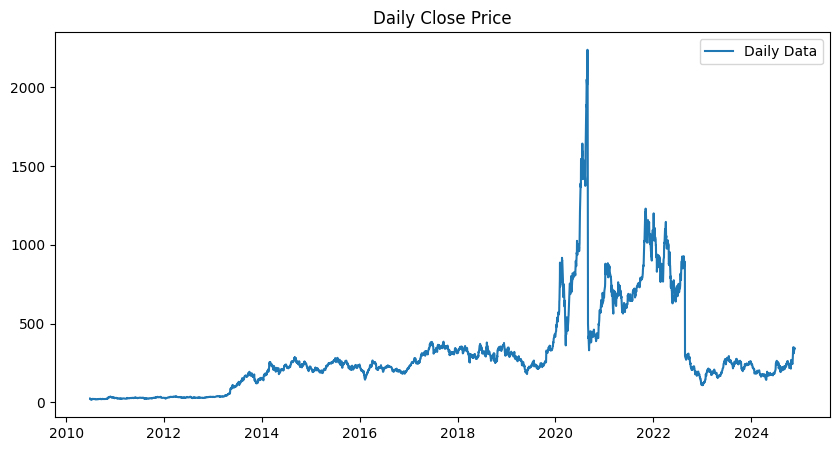

In [309]:
plt.figure(figsize=(10, 5))
plt.plot(data_by_frame['Daily']['DateTime'], data_by_frame['Daily']['Close'], label='Daily Data')
plt.title('Daily Close Price')
plt.legend()
plt.show()

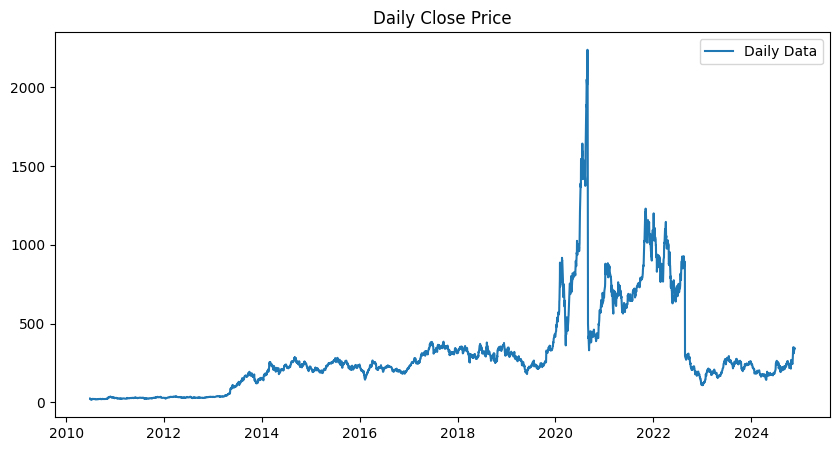

In [310]:
plt.figure(figsize=(10, 5))
plt.plot(data_by_frame['Daily']['DateTime'], data_by_frame['Daily']['Close'], label='Daily Data')
plt.title('Daily Close Price')
plt.legend()
plt.show()

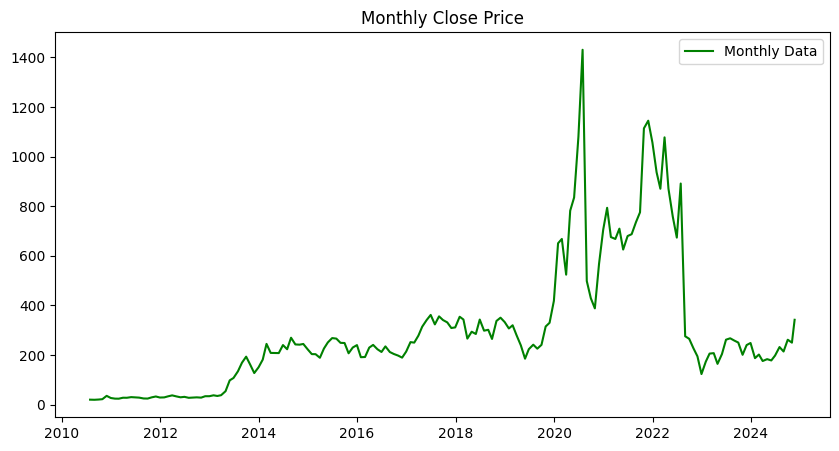

In [311]:
plt.figure(figsize=(10, 5))
plt.plot(data_by_frame['Monthly']['DateTime'], data_by_frame['Monthly']['Close'], label='Monthly Data', color='green')
plt.title('Monthly Close Price')
plt.legend()
plt.show()

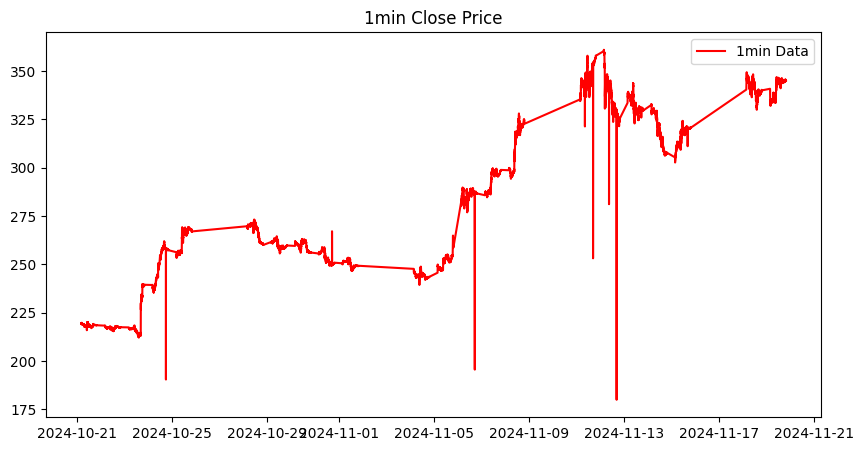

In [312]:

plt.figure(figsize=(10, 5))
plt.plot(data_by_frame['1min']['DateTime'], data_by_frame['1min']['Close'], label='1min Data' ,color = 'red')
plt.title('1min Close Price')
plt.legend()
plt.show()

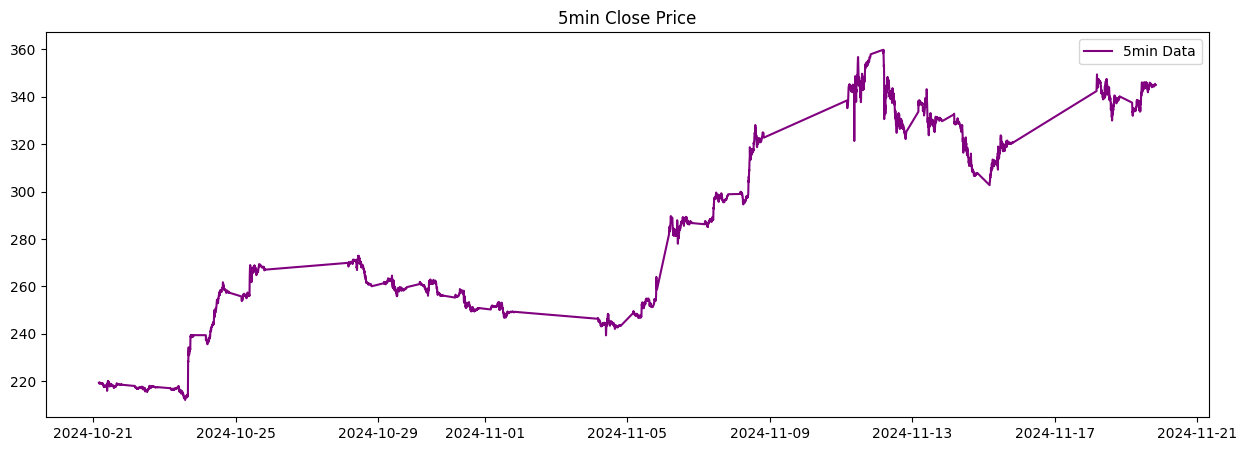

In [313]:
plt.figure(figsize=(15, 5))
plt.plot(data_by_frame['5min']['DateTime'], data_by_frame['5min']['Close'], label='5min Data', color='purple')
plt.title('5min Close Price')
plt.legend()
plt.show()

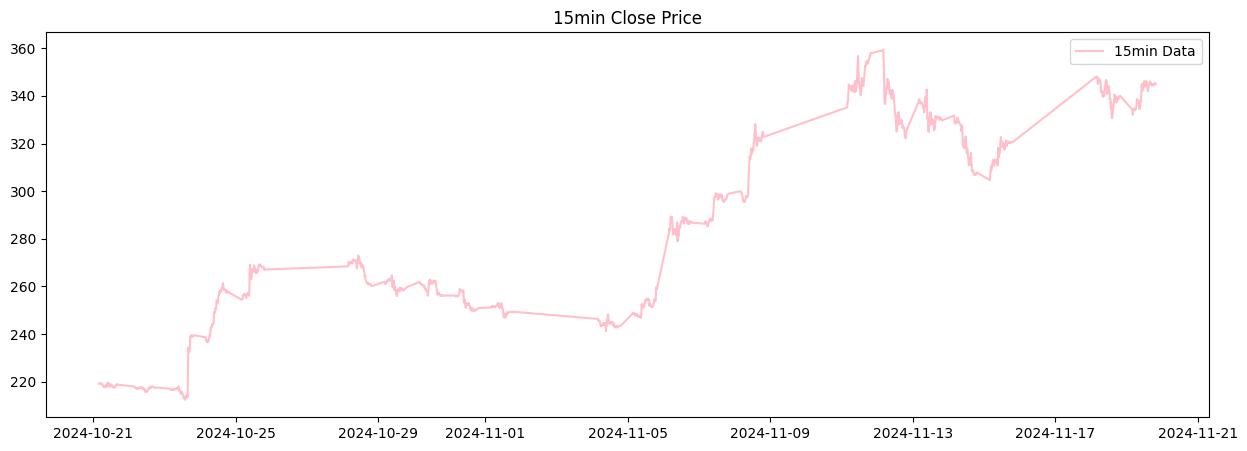

In [314]:

plt.figure(figsize=(15, 5))
plt.plot(data_by_frame['15min']['DateTime'], data_by_frame['15min']['Close'], label='15min Data', color='pink')
plt.title('15min Close Price')
plt.legend()
plt.show()

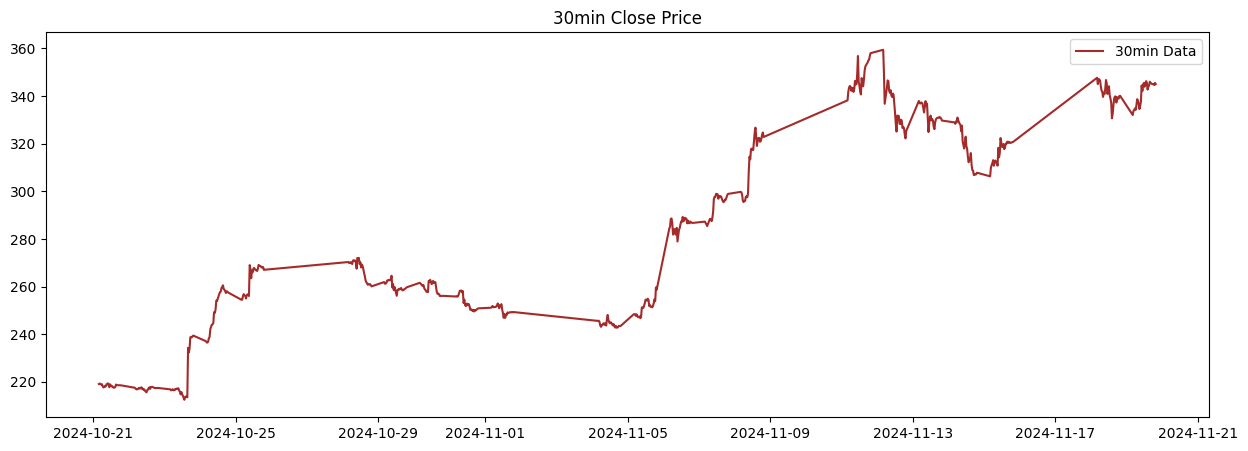

In [315]:
plt.figure(figsize=(15, 5))
plt.plot(data_by_frame['30min']['DateTime'], data_by_frame['30min']['Close'], label='30min Data', color='brown')
plt.title('30min Close Price')
plt.legend()
plt.show()

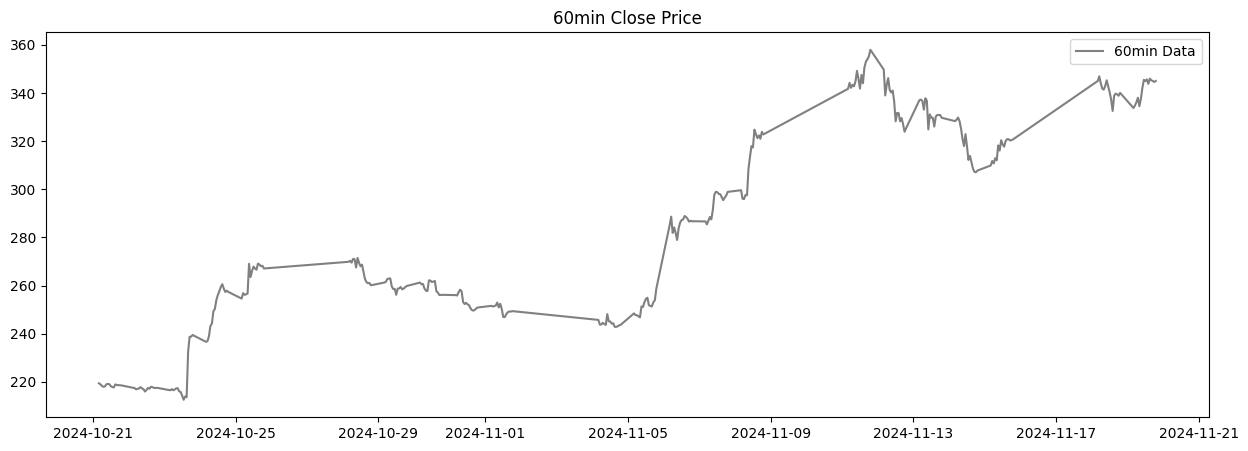

In [316]:
plt.figure(figsize=(15, 5))
plt.plot(data_by_frame['60min']['DateTime'], data_by_frame['60min']['Close'], label='60min Data', color='gray')
plt.title('60min Close Price')
plt.legend()
plt.show()

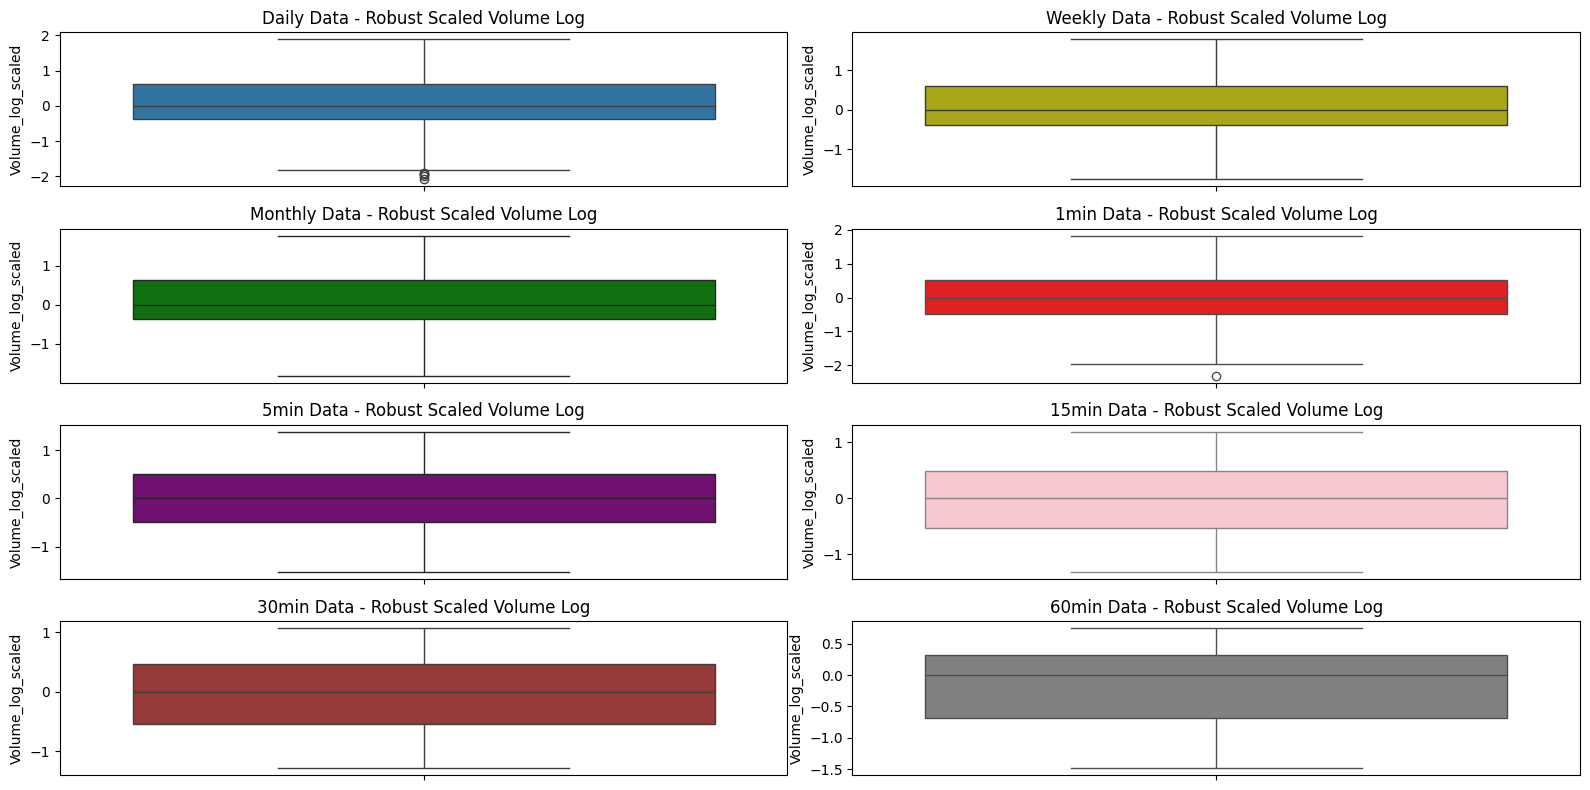

In [319]:
plt.figure(figsize=(12, 8))


plt.subplot(4, 2, 1)
sns.boxplot(data=data_by_frame['Daily']['Volume_log_scaled'])
plt.title('Daily Data - Robust Scaled Volume Log')


plt.subplot(4, 2, 2)
sns.boxplot(data=data_by_frame['Weekly']['Volume_log_scaled'], color='y')
plt.title('Weekly Data - Robust Scaled Volume Log')


plt.subplot(4, 2, 3)
sns.boxplot(data=data_by_frame['Monthly']['Volume_log_scaled'], color='g')
plt.title('Monthly Data - Robust Scaled Volume Log')


plt.subplot(4, 2, 4)
sns.boxplot(data=data_by_frame['1min']['Volume_log_scaled'] , color='red')
plt.title('1min Data - Robust Scaled Volume Log')


plt.subplot(4, 2, 5)
sns.boxplot(data=data_by_frame['5min']['Volume_log_scaled'], color='purple')
plt.title('5min Data - Robust Scaled Volume Log')


plt.subplot(4, 2, 6)
sns.boxplot(data=data_by_frame['15min']['Volume_log_scaled'], color='pink')
plt.title('15min Data - Robust Scaled Volume Log')


plt.subplot(4, 2, 7)
sns.boxplot(data=data_by_frame['30min']['Volume_log_scaled'], color='brown')
plt.title('30min Data - Robust Scaled Volume Log')

plt.subplot(4, 2, 8)
sns.boxplot(data=data_by_frame['60min']['Volume_log_scaled'], color='gray')
plt.title('60min Data - Robust Scaled Volume Log')



plt.tight_layout()
plt.show()

In [318]:
tesla_stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32357 entries, 0 to 32356
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DateTime       32357 non-null  datetime64[ns]
 1   Open           32357 non-null  float64       
 2   High           32357 non-null  float64       
 3   Low            32357 non-null  float64       
 4   Close          32357 non-null  float64       
 5   Volume         32357 non-null  int64         
 6   Frame_encoded  32357 non-null  int64         
 7   Day_of_week    32357 non-null  int32         
 8   Month          32357 non-null  int32         
 9   Hour           32357 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(3), int64(2)
memory usage: 2.1 MB
